In [1]:
import os
import glob
import pickle
import random

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import pandas as pd
import numpy as np
from PIL import Image
from scipy import stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, Matern

In [271]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

(array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [0.],
        [0.]]),
 (50000, 1))

In [317]:

features.shape

(50000, 100)

/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


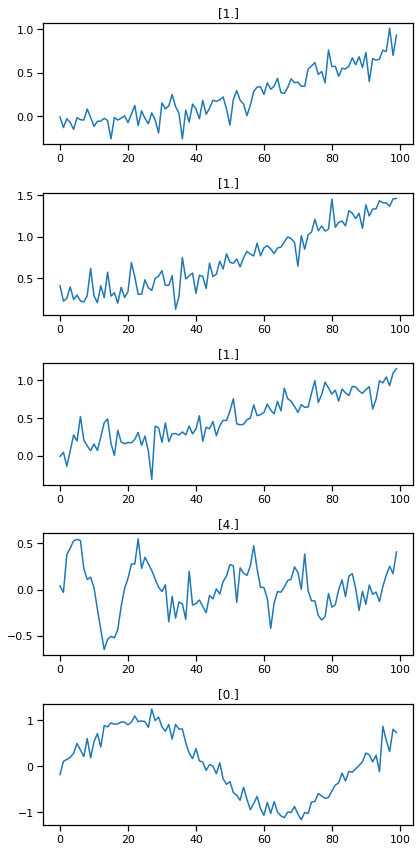

In [327]:
fig, axes = plt.subplots(nrows=5, figsize=(6, 12))
for ax_n, ax in enumerate(axes):    
    ax.plot(features[ax_n])
    ax.set_title(labels[ax_n])
fig.tight_layout()

In [345]:
# check shuffle is consistent

In [351]:
is_three = np.squeeze(labels) == 3

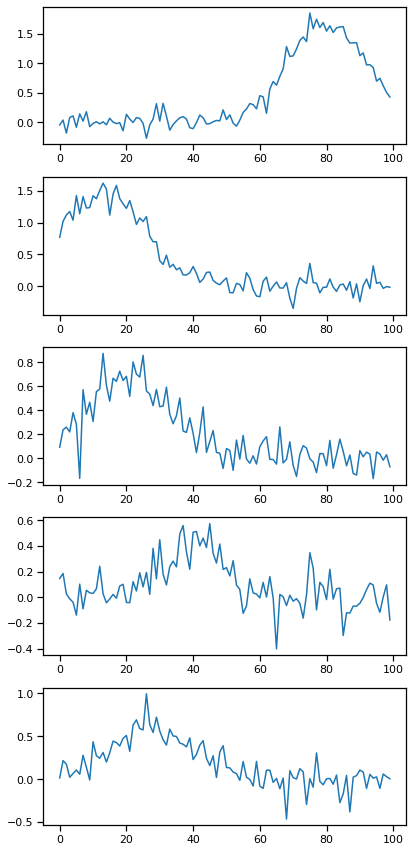

In [352]:
fig, axes = plt.subplots(nrows=5, figsize=(6, 12))
for ax_n, ax in enumerate(axes):    
    ax.plot(features[is_three, :][ax_n])
fig.tight_layout()

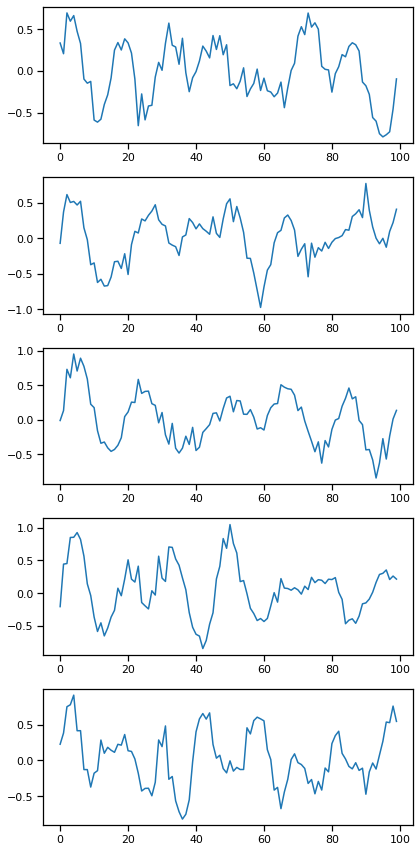

In [343]:
is_four = np.squeeze(labels) == 4
fig, axes = plt.subplots(nrows=5, figsize=(6, 12))
for ax_n, ax in enumerate(axes):    
    ax.plot(features[is_four][ax_n])
fig.tight_layout()

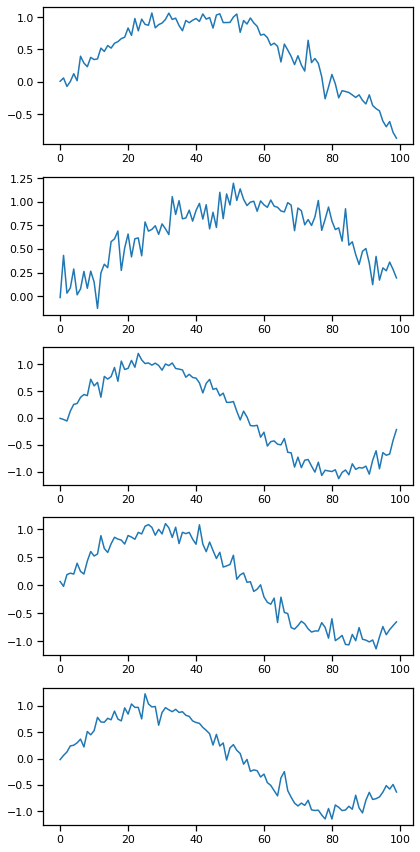

In [344]:
is_zero = np.squeeze(labels) == 0
fig, axes = plt.subplots(nrows=5, figsize=(6, 12))
for ax_n, ax in enumerate(axes):    
    ax.plot(features[is_zero][ax_n])
fig.tight_layout()

In [277]:
forest = IsolationForest(contamination=0.01)
lof = LocalOutlierFactor(n_neighbors=100)

In [278]:
import sklearn

In [410]:
def test_on_features(features, labels, estimator):
    estimator.fit(features)
    if isinstance(estimator, sklearn.ensemble._iforest.IsolationForest):
        print('forest')
        preds = estimator.decision_function(features)
    else:
        print('lof')
        preds = estimator.negative_outlier_factor_
#     print(labels[np.argsort(preds)[::-1]][:20])
    return preds

In [409]:
preds = test_on_features(features, labels, forest)
top_preds = labels[np.argsort(preds)[::-1]][:50]
print(pd.value_counts(top_preds.squeeze()))

forest
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
1.0    49
0.0     1
dtype: int64


In [411]:
preds = test_on_features(features, labels, lof)
top_preds = labels[np.argsort(preds)[::-1]][:50]
print(pd.value_counts(top_preds.squeeze()))

lof
1.0    40
0.0    10
dtype: int64


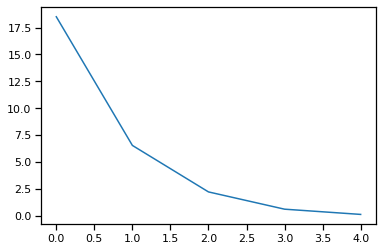

In [390]:
embed.shape

(50000, 5)

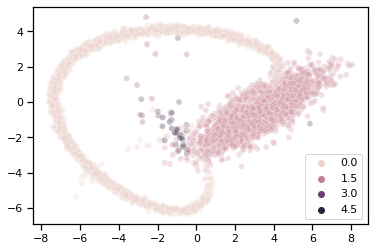

In [393]:
pd.value_counts(labels_subset.flatten())

1.0    2478
0.0    2474
4.0      25
3.0      12
2.0      11
dtype: int64

In [394]:
is_zero = labels_subset.flatten() == 0
is_one = labels_subset.flatten() == 0
two_or_more = labels_subset.flatten() >= 2

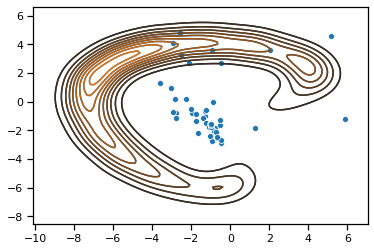

In [395]:
sns.kdeplot(embed_subset[is_zero, 0], embed_subset[is_zero, 1])
sns.kdeplot(embed_subset[is_one, 0], embed_subset[is_one, 1])
sns.scatterplot(embed_subset[two_or_more, 0], embed_subset[two_or_more, 1])

((10, 5), (44991, 5), (4999, 5))

((10, 1), (44991, 1), (4999, 1))

In [439]:


gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

In [440]:
gpr.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RBF(length_scale=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=0)

In [441]:
gpr.score(X_test, y_test)

0.5746306923197151

In [442]:
preds = gpr.predict(X_test)
preds

array([[ 1.08188791],
       [ 0.99113506],
       [-0.01156957],
       ...,
       [ 1.00868154],
       [ 0.00744879],
       [-0.06242553]])

In [443]:
top_preds = y_test[np.argsort(np.squeeze(preds))[::-1]][:50].squeeze()
pd.value_counts(top_preds)

1.0    48
3.0     2
dtype: int64

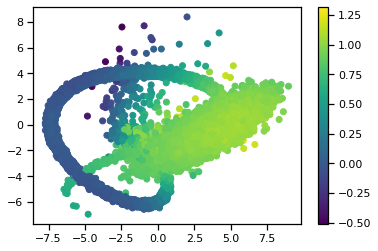

In [447]:
visualise_predictions(embed, optimizer)

In [426]:
# regressor.score(X_test, y_test)  # not yet trained

In [448]:
optimizer.score(X_test, y_test)  # not yet trained

0.5746306923197151

In [449]:
# X_train.shape, y_train.shape

In [450]:
# X_pool[query_idx].reshape(1, -1).shape, y_pool[query_idx].reshape(1, -1).shape

In [453]:
# n_queries = 100
# for idx in range(n_queries):
#     query_idx, query_instance = optimizer.query(X_pool)
#     optimizer.teach(X_pool[query_idx].reshape(1, -1), y_pool[query_idx].reshape(1, -1))

In [454]:
optimizer.score(X_test, y_test)  # not yet trained

0.0012403792587194484

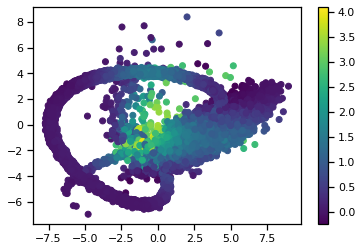

In [455]:
visualise_predictions(embed, optimizer)

In [456]:
preds_post = optimizer.predict(X_test)
top_preds_post = y_test[np.argsort(np.squeeze(preds_post))[::-1]][:50].squeeze()
pd.value_counts(top_preds_post)

4.0    14
0.0    12
1.0    12
3.0    10
2.0     2
dtype: int64

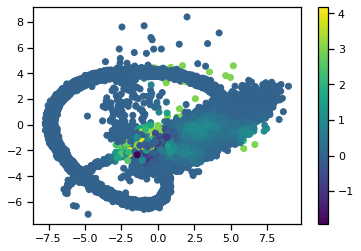

In [458]:
visualise_predictions(embed, optimizer)

1.0    33
4.0    11
3.0     5
2.0     1
dtype: int64

In [460]:
for retrain_batch in range(retrain_batches):
#     for _ in range(retrain_size):
    query_indices, query_instances = optimizer.query(X_pool, n_instances=retrain_size)
    optimizer.teach(X_pool[query_indices], y_pool[query_indices])

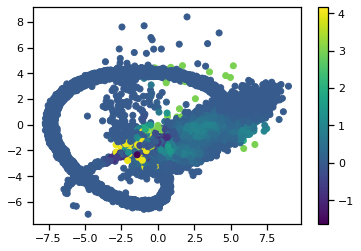

In [461]:
visualise_predictions(embed, optimizer)

In [462]:
preds_post = optimizer.predict(X_test)
top_preds_post = y_test[np.argsort(np.squeeze(preds_post))[::-1]][:50].squeeze()
pd.value_counts(top_preds_post)

1.0    31
4.0    14
3.0     5
dtype: int64